<a href="https://colab.research.google.com/github/Liiura/machine-learning/blob/main/House_pricing_regressor_and_classific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np

from sklearn.compose import ColumnTransformer
import seaborn as sns #para graficar pero mejor
import matploSimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessingtlib.pyplot as plt
from sklearn.impute import  import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
files_Usa_Housing = files.upload()

Saving housing_train.csv to housing_train.csv


In [ ]:
housing_usa = pd.read_csv(io.BytesIO(files_Usa_Housing['housing_train.csv']))

In [ ]:
housing_usa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Hallamos los datos estadísticos de las variables numéricas

In [ ]:
housing_usa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
numeric_var = "Id MSSubClass LotFrontage LotArea OverallQual	OverallCond	YearBuilt	YearRemodAdd	MasVnrArea	BsmtFinSF1	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	1stFlrSF	2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	TotRmsAbvGrd	Fireplaces	GarageYrBlt	GarageCars	GarageArea	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	MiscVal	MoSold	YrSold	SalePrice"

In [ ]:
list_numeric_var = numeric_var.split()
list_numeric_var

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
pd_cate_var=housing_usa.drop(columns=list_numeric_var,axis=1)

Hallamos la frecuencia de las variables categóricas

In [ ]:
pd_cate_var.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


Hacemos una partición de los datos en 80% para entrenamiento y 20 para validación siguiendo las convenciones

In [ ]:
train_set,test_set = train_test_split(housing_usa,test_size=0.3,random_state=17)

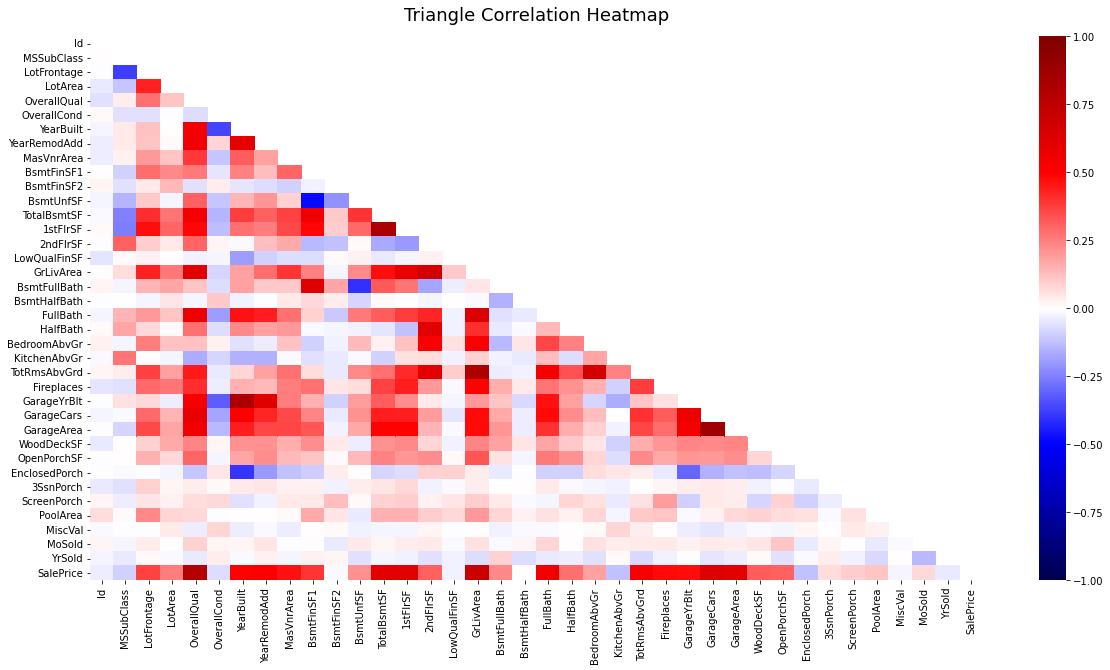

In [ ]:
plt.figure(figsize=(20, 10))
corr_matrix = train_set.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=False, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Como se puede observar en la matriz de correlaciones, hay muchas variables que tienen una alta correlación entre sí, eso quiere decir que las variables a utilizar en el mode IA van a hacer bastantes, seleccionaramos la variables que a criterios personal consideramos que tienen mayor relevancia para el modelo, esto se hará con base a la correlación, inicialmente escogeremos 8 variables

In [ ]:
corr_price_range = corr_matrix["SalePrice"].sort_values(ascending=False)
corr_price_range

SalePrice        1.000000
OverallQual      0.789373
GrLivArea        0.703250
GarageCars       0.637781
GarageArea       0.612990
1stFlrSF         0.611939
TotalBsmtSF      0.611473
FullBath         0.554487
TotRmsAbvGrd     0.530238
YearRemodAdd     0.510372
YearBuilt        0.500527
Fireplaces       0.480351
GarageYrBlt      0.470298
MasVnrArea       0.462885
BsmtFinSF1       0.395815
LotFrontage      0.373151
WoodDeckSF       0.316604
OpenPorchSF      0.308256
2ndFlrSF         0.304786
HalfBath         0.278549
LotArea          0.253852
BsmtFullBath     0.228875
BsmtUnfSF        0.211222
BedroomAbvGr     0.183998
PoolArea         0.111390
ScreenPorch      0.099292
MoSold           0.070949
3SsnPorch        0.062799
BsmtHalfBath     0.003142
BsmtFinSF2      -0.012097
MiscVal         -0.020484
LowQualFinSF    -0.023886
Id              -0.034215
YrSold          -0.039669
OverallCond     -0.064299
MSSubClass      -0.091328
EnclosedPorch   -0.119549
KitchenAbvGr    -0.123624
Name: SalePr

In [ ]:
NUM_RELEVANT_VALUES = 8 # 
most_relevant_values = np.abs(corr_price_range).sort_values(ascending=False)[:NUM_RELEVANT_VALUES] # selección de los valores de las variables numéricas más relevantes
cat_val_list_relevant=['MSZoning','Street','Neighborhood','Condition1','HouseStyle','Heating','Electrical'] # elegimos las variables categóricas a trabajar que consideremos que tienen una alta relevancia para construcción al variable

In [ ]:
most_relevant_numeric_cols = [
    key for key, value in most_relevant_values.iteritems() if key !='SalePrice'] # se seleccionan los labels de las columnas 8 columnas más relevantes
most_relevant_numeric_cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath']

In [ ]:
list_all_var = most_relevant_numeric_cols + cat_val_list_relevant # se construye una lista con todos los labels de las variables a trabajar para entrer el modelo
#list_all_var = most_relevant_numeric_cols
#list_all_var = cat_val_list_relevant

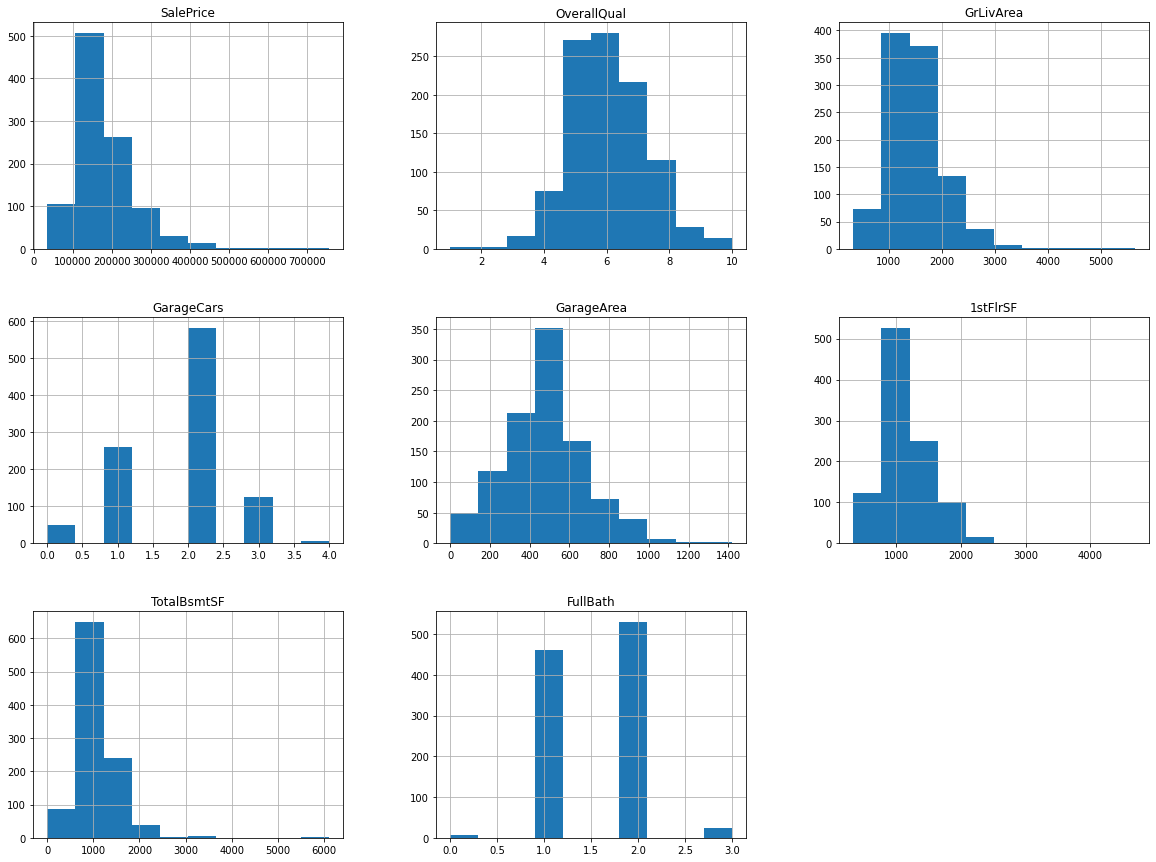

In [ ]:
most_relevant_cols = [
    key for key, value in most_relevant_values.iteritems()]
train_set[most_relevant_cols].hist(figsize=(20,15))
plt.show() # graficamos esas variables

In [ ]:
x_train = train_set[list_all_var]
y_train = train_set['SalePrice'].copy() # separamos las variables con la cuales trabajaremos

In [ ]:
preproc_numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ("std_scaler",StandardScaler()) # creamos el pipeline que procesa las variables numéricas
])
preproc_cat_pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder', OneHotEncoder(sparse=False)),  # creamos el pipeline que procesa las variables categóricas con el oneHotEncoder
])

In [ ]:
full_pipeline_data_prepare = ColumnTransformer([
          ("preparation_numerical",preproc_numeric_pipeline, most_relevant_numeric_cols),
          ("preparation_categorical", preproc_cat_pipeline, cat_val_list_relevant),
]) # construimos un fullpipeline para preparar todos los datos y utilizarlo en los diferentes modelos de entrenamiento
x_train = full_pipeline_data_prepare.fit_transform(x_train)

In [ ]:
def display_score(scores):
  print("Scores",scores)
  print("Mean",scores.mean())
  print("standard desviation",scores.std()) # mostramos los scores

In [ ]:
def displayScorePredict(model):
  housing_predictions = model.predict(x_train)
  lin_mse = mean_squared_error(y_train, housing_predictions)
  lin_rmse = np.sqrt(lin_mse)
  print("rmse=",lin_rmse)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model_grid = KNeighborsRegressor()
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
scores_knn = cross_val_score(knn_model, x_train, y_train, scoring = 'neg_mean_squared_error', cv=10, n_jobs=-1)
scores_knm = np.sqrt(-scores_knn)

display_score(scores_knm)

knn_model.fit(x_train, y_train)
displayScorePredict(knn_model)
model = GridSearchCV(knn_model_grid, params, cv=10)
model.fit(x_train, y_train)
model.best_params_

Scores [47357.41296125 27222.85293635 30270.12747706 49341.33654045
 28377.59318146 32037.40949107 28409.13094008 56540.5672564
 29239.76188087 28934.46576469]
Mean 35773.0658429677
standard desviation 10321.331539360155
rmse= 30838.348161384394


{'n_neighbors': 6}

In [ ]:
 tree_model = tree.DecisionTreeRegressor()
 scores_tree = cross_val_score(
     tree_model, x_train,y_train,
     scoring ="neg_mean_squared_error",cv=10,n_jobs=-1)
 scores_tr = np.sqrt(-scores_tree)

 display_score(scores_tr) # creamos el cross validations y mostramos las estadísticas del modelo

tree_model.fit(x_train, y_train)
displayScorePredict(tree_model)

Scores [68685.09376315 37276.36424571 33395.43936984 46999.22345249
 42259.58875063 43180.00716358 40726.58097667 45829.93344859
 34483.11413668 33822.5262911 ]
Mean 42665.78715984367
standard desviation 9849.514587167349
rmse= 1313.3556941350398


In [ ]:
randomf = RandomForestRegressor()
scores_RandomF =  cross_val_score(
     randomf, x_train,y_train,
     scoring ="neg_mean_squared_error",cv=10,n_jobs=-1)
scores_rand = np.sqrt(-scores_RandomF)

display_score(scores_rand) # creamos el cross validations y mostramos las estadísticas del modelo

randomf.fit(x_train, y_train)
displayScorePredict(randomf)

Scores [51623.34264004 27213.82514532 28606.45161794 31968.47315191
 26680.64797395 31805.0075226  26572.89302415 41387.16993394
 25004.55726145 23695.28187928]
Mean 31455.765015057666
standard desviation 8248.32609197328
rmse= 12160.239015369949


In [ ]:
def encoding_target(tar_array):
  for key,value in tar_array.items():
    if value <= 100000:
      tar_array.loc[key] = 1
    elif value <= 500000:
      tar_array.loc[key] = 2
    elif value > 500000:
      tar_array.loc[key] = 3
  return tar_array

In [ ]:
y_train_classific = encoding_target(y_train.copy())

In [ ]:
knn_classif = KNeighborsClassifier()
scores_knnclass =  cross_val_score(
     knn_classif, x_train,y_train_classific,
     scoring ="f1_micro",cv=6,n_jobs=-1)

display_score(scores_knnclass) # creamos el cross validations y mostramos las estadísticas del modelo

knn_classif.fit(x_train, y_train)

Scores [0.92982456 0.9005848  0.95882353 0.92941176 0.91176471 0.91764706]
Mean 0.9246760692581125
standard desviation 0.018309754183145004


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
randomf_class = RandomForestClassifier()
scores_rnfclass =  cross_val_score(
     randomf_class, x_train,y_train_classific,
     scoring ="f1_micro",cv=6,n_jobs=-1)

display_score(scores_rnfclass) # creamos el cross validations y mostramos las estadísticas del modelo


Scores [0.94152047 0.91812865 0.95294118 0.94117647 0.93529412 0.92941176]
Mean 0.9364121087031304
standard desviation 0.010851604788627931


In [ ]:
tree_class = tree.DecisionTreeClassifier()
scores_tree_class =  cross_val_score(
     tree_class, x_train,y_train_classific,
     scoring ="f1_micro",cv=6,n_jobs=-1)
display_score(scores_tree_class)

Scores [0.9122807  0.87719298 0.94117647 0.90588235 0.88823529 0.92941176]
Mean 0.9090299277605779
standard desviation 0.022042769511790034
